In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=35040,n_classes=2,n_features=3,n_informative=2,n_redundant=1,
                           weights=[0.999,0.001],class_sep=1.0)

In [4]:
df=pd.DataFrame(data=X,columns=['Temp','Humidity','Crime'])

In [5]:
df['y']=y

In [6]:
df['Temp']=df['Temp']-min(df['Temp'])
maxt=max(df['Temp'])
df['Temp']=90*df['Temp']/maxt

In [7]:
df['Humidity']=df['Humidity']-min(df['Humidity'])
maxh=max(df['Humidity'])
df['Humidity']=100*df['Humidity']/maxh

In [8]:
df['Crime']=df['Crime']-min(df['Crime'])
maxc=max(df['Crime'])
df['Crime']=10*df['Crime']/maxc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc79052c898>]],
      dtype=object)

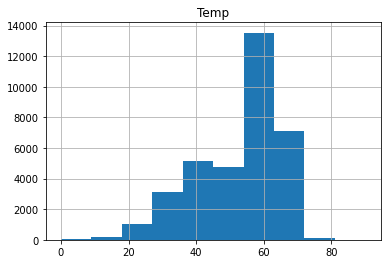

In [9]:
df.hist('Temp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc78ffe4c88>]],
      dtype=object)

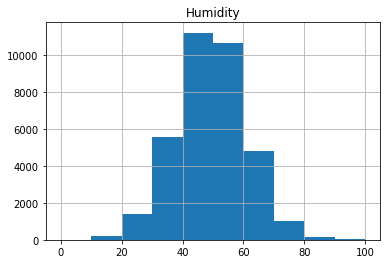

In [10]:
df.hist('Humidity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc78ffc9e80>]],
      dtype=object)

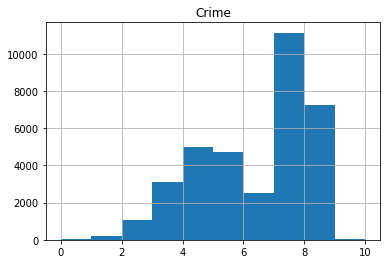

In [11]:
df.hist('Crime')

In [12]:
sum(df['y']==1)

202

In [13]:
df.head(10)

,Temp,Humidity,Crime,y
0,60.823946,48.992934,7.693267,0
1,33.937009,33.833207,4.012265,0
2,35.587979,41.216747,3.923161,0
3,60.671036,42.156770,8.001984,0
4,63.433238,61.413614,7.515750,0
5,63.290663,57.878738,7.664940,0
6,51.120501,63.132246,5.407074,0
7,63.573225,42.865051,8.444637,0
8,22.286076,26.633516,2.447967,0
9,65.729784,55.302313,8.191862,0


In [14]:
df.describe()

,Temp,Humidity,Crime,y
count,35040.000000,35040.000000,35040.000000,35040.000000
mean,53.061194,49.293320,6.402067,0.005765
std,12.379352,11.408695,1.795109,0.075708
min,0.000000,0.000000,0.000000,0.000000
25%,43.837462,41.704232,4.884963,0.000000
50%,59.722041,49.330225,7.342497,0.000000
75%,62.590952,56.845546,7.935000,0.000000
max,90.000000,100.000000,10.000000,1.000000


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

In [16]:
df0=df[df['y']==0].sample(800)
df1=df[df['y']==1]
df_balanced = pd.concat([df0,df1],axis=0)
df_balanced.describe()

,Temp,Humidity,Crime,y
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,52.724211,50.073557,6.308548,0.201597
std,12.804592,12.445511,1.839088,0.401393
min,4.501824,6.230797,0.519892,0.000000
25%,43.233101,42.015106,4.722632,0.000000
50%,59.539015,49.859597,7.211771,0.000000
75%,62.586140,57.309844,7.916987,0.000000
max,77.495302,99.214525,8.886506,1.000000


Text(0.5, 1.0, 'Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset')

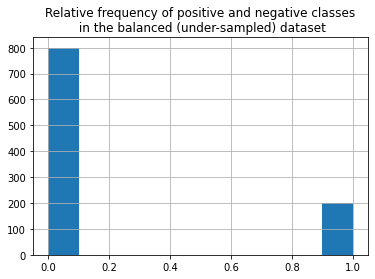

In [17]:
df_balanced.hist('y')
plt.title("Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset")

In [18]:
log_model_balanced = LogisticRegressionCV(cv=5,class_weight='balanced')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y',axis=1), 
                                                    df_balanced['y'], test_size=0.30)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
scaler=MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
log_model_balanced.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [25]:
print(classification_report(y_test,log_model_balanced.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.17      1.00      0.28        50

    accuracy                           0.17       301
   macro avg       0.08      0.50      0.14       301
weighted avg       0.03      0.17      0.05       301



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
n_neg = [i for i in range(200,4200,200)]

df1=df[df['y']==1]
F1_scores=[]
precision_scores=[]
recall_scores=[]

for num in n_neg:
    # Create under-sampled data sets
    df0=df[df['y']==0].sample(num)
    df_balanced = pd.concat([df0,df1],axis=0)
    # Create model with 'class_weight=balanced' and 5-fold cross-validation
    log_models=LogisticRegressionCV(cv=5,class_weight='balanced')
    # Create test/train splits
    X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y',axis=1), 
                                                    df_balanced['y'], test_size=0.30)
    # Min-max scale the training data
    X_train = scaler.fit_transform(X_train)
    
    # Fit the logistic regression model
    log_models.fit(X_train,y_train)
    
    # Calculate various scores
    F1_scores.append(f1_score(y_test,log_models.predict(X_test)))
    precision_scores.append(precision_score(y_test,log_models.predict(X_test)))
    recall_scores.append(recall_score(y_test,log_models.predict(X_test)))

Text(0.5, 0, 'Number of negative samples')

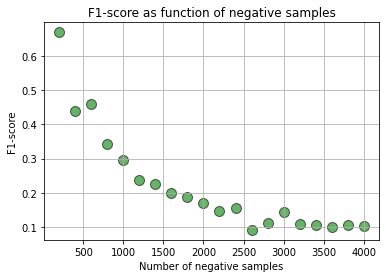

In [28]:
plt.scatter(n_neg,F1_scores,color='green',edgecolor='black',alpha=0.6,s=100)
plt.title("F1-score as function of negative samples")
plt.grid(True)
plt.ylabel("F1-score")
plt.xlabel("Number of negative samples")

Text(0.5, 0, 'Number of negative samples')

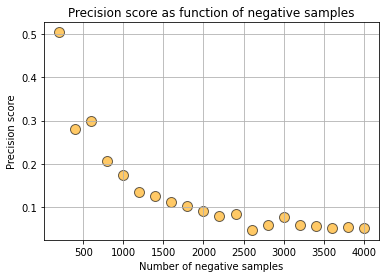

In [29]:
plt.scatter(n_neg,precision_scores,color='orange',edgecolor='black',alpha=0.6,s=100)
plt.title("Precision score as function of negative samples")
plt.grid(True)
plt.ylabel("Precision score")
plt.xlabel("Number of negative samples")

Text(0.5, 0, 'Number of negative samples')

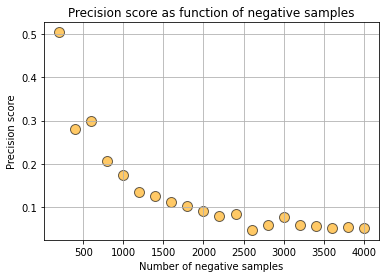

In [30]:
plt.scatter(n_neg,precision_scores,color='orange',edgecolor='black',alpha=0.6,s=100)
plt.title("Precision score as function of negative samples")
plt.grid(True)
plt.ylabel("Precision score")
plt.xlabel("Number of negative samples")